In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
df= pd.read_csv("../../data/processed/total.csv")

In [3]:
df.head()

,Unnamed: 0,year,playername,team,age,attempts,yards_run,tds_run,longgain_run,yardsperatt,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,0,2020,Aaron Jones,GNB,26,75,389,5,75,5.2,...,73.3%,261,7.9,2,12,30,5.8,3.7,29.0,2.0
1,1,2019,Aaron Jones,GNB,25,236,1084,16,56,4.6,...,72.1%,474,9.7,3,18,67,7.0,3.1,29.6,3.0
2,2,2018,Aaron Jones,GNB,24,133,728,8,67,5.5,...,74.3%,206,7.9,1,12,24,5.9,2.2,17.2,1.0
3,3,2017,Aaron Jones,GNB,23,81,448,4,46,5.5,...,50.0%,22,2.4,0,2,9,1.2,0.8,1.8,0.0
4,4,2020,Adrian Peterson,DET,35,80,314,2,27,3.9,...,68.8%,78,7.1,0,3,18,4.9,1.0,7.1,0.0


In [26]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)

In [5]:
df.head()

,age,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,Percenthit (%),g,gs,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,26,75,389,5,75,5.2,77.8,1.100909,9,9,...,73.3%,261,7.9,2,12,30,5.8,3.7,29.0,2.0
1,25,236,1084,16,56,4.6,67.8,0.369547,16,16,...,72.1%,474,9.7,3,18,67,7.0,3.1,29.6,3.0
2,24,133,728,8,67,5.5,60.7,0.293098,12,8,...,74.3%,206,7.9,1,12,24,5.9,2.2,17.2,1.0
3,23,81,448,4,46,5.5,37.3,0.308675,12,4,...,50.0%,22,2.4,0,2,9,1.2,0.8,1.8,0.0
4,35,80,314,2,27,3.9,52.3,0.529768,11,8,...,68.8%,78,7.1,0,3,18,4.9,1.0,7.1,0.0


In [27]:
df['catchpercent']

0      73.3%
1      72.1%
2      74.3%
3      50.0%
4      68.8%
       ...  
598    46.2%
599    72.7%
600    75.0%
601    78.3%
602    74.3%
Name: catchpercent, Length: 603, dtype: object

In [28]:
df['catchpercent'] = df['catchpercent'].str[:-1]

In [31]:
df['catchpercent']

0      73.3
1      72.1
2      74.3
3      50.0
4      68.8
       ... 
598    46.2
599    72.7
600    75.0
601    78.3
602    74.3
Name: catchpercent, Length: 603, dtype: object

In [33]:
df.head()

,age,attempts,yards_run,tds_run,longgain_run,yardsperatt,yardspergame_run,Percenthit (%),g,gs,...,catchpercent,yards_rec,yardsperrec,tds_rec,firstdowns,longgain_rec,yardspertarget,recpergame,yardspergame_rec,fumbles
0,26,75,389,5,75,5.2,77.8,1.100909,9,9,...,73.3,261,7.9,2,12,30,5.8,3.7,29.0,2.0
1,25,236,1084,16,56,4.6,67.8,0.369547,16,16,...,72.1,474,9.7,3,18,67,7.0,3.1,29.6,3.0
2,24,133,728,8,67,5.5,60.7,0.293098,12,8,...,74.3,206,7.9,1,12,24,5.9,2.2,17.2,1.0
3,23,81,448,4,46,5.5,37.3,0.308675,12,4,...,50.0,22,2.4,0,2,9,1.2,0.8,1.8,0.0
4,35,80,314,2,27,3.9,52.3,0.529768,11,8,...,68.8,78,7.1,0,3,18,4.9,1.0,7.1,0.0


# Splitting & Scaling

In [35]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# DNN Model

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [79]:
X_train.shape
model = Sequential()

model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))
model.add(Dense(10, activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=10,epochs=100)

Epoch 1/100
43/43 [==============================] - 0s 3ms/step - loss: 5.3853 - val_loss: 4.1782
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 3.6484 - val_loss: 3.5337
Epoch 3/100
43/43 [==============================] - 0s 1ms/step - loss: 3.4318 - val_loss: 3.5260
Epoch 4/100
43/43 [==============================] - 0s 2ms/step - loss: 3.3755 - val_loss: 3.4386
Epoch 5/100
43/43 [==============================] - 0s 1ms/step - loss: 3.3095 - val_loss: 3.3912
Epoch 6/100
43/43 [==============================] - 0s 1ms/step - loss: 3.3061 - val_loss: 3.3526
Epoch 7/100
43/43 [==============================] - 0s 1ms/step - loss: 3.2516 - val_loss: 3.3185
Epoch 8/100
43/43 [==============================] - 0s 2ms/step - loss: 3.2128 - val_loss: 3.2526
Epoch 9/100
43/43 [==============================] - 0s 2ms/step - loss: 3.2039 - val_loss: 3.2186
Epoch 10/100
43/43 [==============================] - 0s 1ms/step - loss: 3.1541 - val_loss: 3.1706
Epoch 11/

43/43 [==============================] - 0s 2ms/step - loss: 2.1649 - val_loss: 2.9798
Epoch 84/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1763 - val_loss: 2.5420
Epoch 85/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1837 - val_loss: 2.9183
Epoch 86/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1880 - val_loss: 2.4993
Epoch 87/100
43/43 [==============================] - 0s 1ms/step - loss: 2.2003 - val_loss: 2.8682
Epoch 88/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1226 - val_loss: 2.4901
Epoch 89/100
43/43 [==============================] - 0s 1ms/step - loss: 2.2862 - val_loss: 2.8020
Epoch 90/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1274 - val_loss: 3.3076
Epoch 91/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1995 - val_loss: 2.8536
Epoch 92/100
43/43 [==============================] - 0s 1ms/step - loss: 2.1893 - val_loss: 2.7448
Epoch 93/100


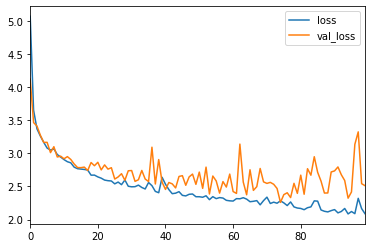

In [78]:
losses = pd.DataFrame(model.history.history)
losses.plot()

# Evaluation

In [71]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

In [72]:
print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )

MSE:  2.5189137803400614
RMSE:  1.5871086227287852
MAE:  1.1566602010103195


In [73]:
explained_variance_score(y_test,predictions)

0.39494943712946595